In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('advt.csv')
data=pd.DataFrame(data=data)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

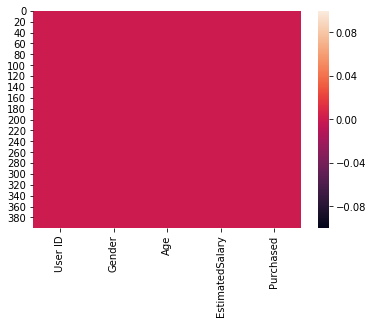

In [6]:
sns.heatmap(data.isnull())

In [7]:
le=LabelEncoder()
list1=['Gender']
for val in list1:
    data[val]=le.fit_transform(data[val].astype(str))

In [8]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [9]:
x=data.iloc[:,2:4]
y=data.iloc[:,4]

In [10]:
x.shape

(400, 2)

In [11]:
y.shape

(400,)

In [12]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=0)

In [13]:
train_x.shape

(300, 2)

In [14]:
test_x.shape

(100, 2)

In [15]:
train_y.shape

(300,)

In [16]:
test_y.shape

(100,)

In [17]:
lg=LogisticRegression()

In [18]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pred=lg.predict(test_x)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
print("accuracy score:",accuracy_score(pred,test_y))

accuracy score: 0.68


In [21]:
print(confusion_matrix(test_y,pred))

[[68  0]
 [32  0]]


In [22]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



In [23]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.9
[[65  3]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [24]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.9
[[65  3]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [25]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.9
[[62  6]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



In [26]:
dtc=KNeighborsClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.83
[[59  9]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.73      0.75      0.74        32

    accuracy                           0.83       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.83      0.83      0.83       100



In [27]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

array([0.47198532, 0.44382236, 0.45825063, 0.46916932, 0.44949542,
       0.45415748, 0.44483647, 0.48062256, 0.48820062, 0.4244786 ,
       0.45862824, 0.46453804, 0.44745779, 0.45136269, 0.4907319 ,
       0.47873987, 0.45515486, 0.49229104, 0.43962039, 0.43972685,
       0.44844679, 0.45965979, 0.43851177, 0.44600753, 0.46456491,
       0.45481028, 0.47580049, 0.47142735, 0.44990431, 0.46782164,
       0.48952601, 0.45585571, 0.41170825, 0.44675925, 0.47321499,
       0.48255393, 0.48514347, 0.44894144, 0.45147547, 0.41833611,
       0.4780617 , 0.43885968, 0.4766517 , 0.43903079, 0.45603384,
       0.46749679, 0.45620621, 0.43136971, 0.45956194, 0.4356187 ,
       0.43307687, 0.44265821, 0.45194397, 0.47421786, 0.41759611,
       0.42442012, 0.47248369, 0.47715055, 0.41558826, 0.46175447,
       0.44399388, 0.40004109, 0.48911313, 0.46477621, 0.47148119,
       0.4140215 , 0.48414458, 0.46749679, 0.43900418, 0.44324308,
       0.49038462, 0.45895224, 0.47879379, 0.42097233, 0.47841

In [28]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [29]:
fpr

array([0.        , 0.01470588, 0.04411765, 0.04411765, 0.14705882,
       0.14705882, 0.41176471, 0.44117647, 0.44117647, 0.51470588,
       0.51470588, 0.58823529, 0.58823529, 0.60294118, 0.60294118,
       0.76470588, 0.76470588, 0.77941176, 0.77941176, 0.91176471,
       0.91176471, 0.94117647, 0.94117647, 0.95588235, 0.95588235,
       0.97058824, 0.97058824, 0.98529412, 0.98529412, 1.        ,
       1.        ])

In [30]:
tpr

array([0.     , 0.     , 0.     , 0.03125, 0.03125, 0.125  , 0.125  ,
       0.125  , 0.15625, 0.15625, 0.1875 , 0.1875 , 0.25   , 0.25   ,
       0.3125 , 0.3125 , 0.375  , 0.375  , 0.40625, 0.40625, 0.4375 ,
       0.4375 , 0.46875, 0.46875, 0.5    , 0.5    , 0.65625, 0.65625,
       0.8125 , 0.8125 , 1.     ])

In [31]:
thresholds

array([1.49314399, 0.49314399, 0.4907319 , 0.49038462, 0.48238044,
       0.47941812, 0.46782164, 0.46749679, 0.46477621, 0.461317  ,
       0.45965979, 0.45620621, 0.45585571, 0.45515486, 0.45481028,
       0.44675925, 0.44670585, 0.44638336, 0.44600753, 0.43972685,
       0.43962039, 0.43900418, 0.43889202, 0.43885968, 0.43883881,
       0.43851177, 0.42565787, 0.4244786 , 0.41759611, 0.41587897,
       0.40004109])

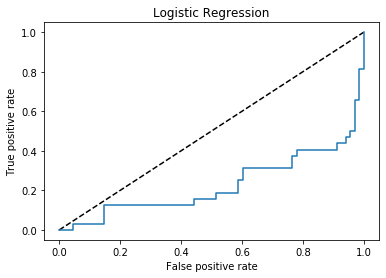

In [32]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))


In [35]:
print(auc_score)

0.5


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
gnb=GaussianNB()
score=cross_val_score(gnb,x,y,cv=5)
print("Score:",score)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(gnb,x,y,cv=5)
print('Y prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

Score: [0.82716049 0.96296296 0.925      0.81012658 0.89873418]
Mean scores 0.8847968432567589
Std Deviation 0.0579966930264993
Y prediction values
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1]


0.885

In [41]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,x,y,cv=8,scoring='f1_macro')
print('F1-score:',score)
print('Mean Scores',score.mean())
print('standard deviation',score.std())
y_pred=cross_val_predict(gnb,x,y,cv=8)
print('Y prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score: [0.76388889 0.91319444 0.88692899 0.90808824 0.76190476 0.71590909
 0.72114972 0.84444444]
Mean Scores 0.8144385723052592
standard deviation 0.07778506851175569
Y prediction values
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 

array([[240,  17],
       [ 29, 114]], dtype=int64)

In [42]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=8,scoring='accuracy')
print("Accuracy Score:",score)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(knn,x,y,cv=10)
print('Y prediction values')
print(y_pred)
print("y_pred.shape",y_pred.shape)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Accuracy Score: [0.74509804 0.92       0.82       0.8        0.66       0.72
 0.76       0.7755102 ]
Mean scores 0.7750760304121649
Std Deviation 0.07162780650868328
Y prediction values
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0]
y_

array([[220,  37],
       [ 52,  91]], dtype=int64)

In [43]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=8,scoring='accuracy')
print("Accuracy Score:",score)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(knn,x,y,cv=10)
print('Y prediction values')
print(y_pred)
print("y_pred.shape",y_pred.shape)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

Accuracy Score: [0.70588235 0.66       0.66       0.72       0.66       0.62
 0.62       0.75510204]
Mean scores 0.6751230492196879
Std Deviation 0.04488866162133832
Y prediction values
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0]
y_

0.7775

In [44]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(sv,x,y,cv=8,scoring='accuracy')
    print("Accuracy Score:",score)
    print("Mean scores",score.mean())
    print("Std Deviation",score.std())
    y_pred=cross_val_predict(svc,x,y,cv=10)
    
    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)

In [45]:
svmkernel('rbf')

Accuracy Score: [0.70588235 0.66       0.66       0.72       0.66       0.62
 0.62       0.75510204]
Mean scores 0.6751230492196879
Std Deviation 0.04488866162133832
[[249   8]
 [119  24]]


In [ ]:
svmkernel('poly')

Accuracy Score: [0.70588235 0.66       0.66       0.72       0.66       0.62
 0.62       0.75510204]
Mean scores 0.6751230492196879
Std Deviation 0.04488866162133832


In [ ]:
svrbf=SVC(kernel='rbf')
score=cross_val_score(svrbf,x,y,cv=8)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(svrbf,x,y,cv=10)
print('Y prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
print(conf_mat)